<a href="https://colab.research.google.com/github/MohamedElsayed002/DeepLearning_IBM/blob/master/LSTMandGRU20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM and GRU Demo

Vanilla RNNs work well when dealing with short-term dependencies but suffer from vansihing gradient descent problem when it comes to long-term context dependencies. this is because some information is lost at each time step when traversing the layers. Gated RNNs have units that are designed ti forget and to update relevant information and can provide a good solution to this problem. In this lab,we will talk about two types of gated `RNNs` : `LSTM` and `GRUs`

## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="#Gated-RNNs">Gated RNNs</a>
        <ol>
            <li><a href="#LSTM">LSTM</a></li>
            <li><a href="#GRU">GRU</a></li>
            <li><a href="#LSTM in Keras: Time-series forecasting">LSTM in Keras: Time-series forecasting</a></li>
            <li><a href="#Exercise 1: GRU in Keras - Reuters classification">Exercise 1: GRU in Keras - Reuters classification</a></li>
        </ol>
    </li>


## Objectives

After completing this lab,you will be able to:

 - Explain the fundamental components of LSTM and GRU
 - Implement LSTM and GRU in Keras for various tasks and applications

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
print(tf. __version__)

from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding,Masking,LSTM, GRU, Conv1D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SimpleRNN
from tensorflow.keras.datasets import reuters
from keras.utils import pad_sequences


sns.set_context('notebook')
sns.set_style('white')
np.random.seed(2024)

2.15.0


# Gated RNN

The two types of gated RNNs we will be studying in this lab are Long short Term Memories (LSTM) and Gated Recurrent units (GRU). GRU is simpler than LSTM. it's much faster and optimizes quicker

# LSTM

the key idea of LSTMS is to have two state representations the hidden state `h` and the cell state C (instead of S)

An LSTM cell has a complex internal structure that makes it able

- learn recognize an important input
- store it in the long-term state
- preserve it for as long as it is needed
- extract it whenever it is needed

<img src="https://wiki.math.uwaterloo.ca/statwiki/images/thumb/9/98/LSTM.png/800px-LSTM.png" alt="Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/" style="width: 500px;">

Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/

LSTM has the ability to remove or add information to the cell state, carefully regulated by structures called gates, which are a way to optionally let information through. There are three gates in an LSTM; forget gate, input gate, and output gate. They are composed out of a *sigmoid* neural net layer. Sigmoid-based layers output values near either 0 (gate closed) or 1 (gate open).


# GRU

GRU is a simplification of the LSTM cell that performs similarly well while being faster to train. it has a single update gate controller that manages both forget and imput gates. whenever one is open, the other is closed. there is no output gate.the reset gate controls which part of the previous state is shown to the main layer. the resulting model is simpler than standard LSTM models.GRUs have fewer parameters and thus may train a bit faster or need less data to generalize


<img src="https://github.com/DataScienceUB/DeepLearningMaster2019/blob/master/images/gru.png?raw=1" alt="Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/" style="width: 300px;">

### LSTM in Keras: Time-series forecasting


Next, we will build a simple `LSTM` model to solve a many-to-one time-series prediction problem on a simulated sine wave.

Let's first start by generating some sine waves using `np.sin()` function

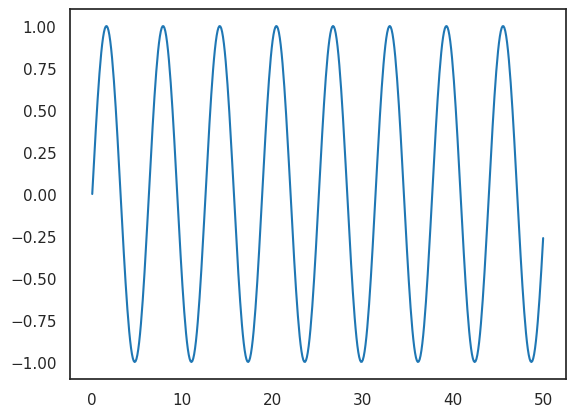

In [ ]:
x = np.linspace(0,50,501)
y = np.sin(x)
plt.plot(x,y)

In [ ]:
# We convert this into a dataframe for convenience

df = pd.DataFrame(data=y,index=x,columns=['Sine'])

We are dealing with a univariate time series, so we have a total of one feature. we will be using 10% of the simulated data for testing

In [ ]:
# Percentage of data used for testing
test_percent = 0.1
# number of features
n_features = 1
# sequence length
length = 50
# batch size
batch_size = 1

Let us now create a training and testing dataset to train and test our model on.

In [ ]:
test_point = np.round(len(df)*test_percent)
test_ind = int(len(df)-test_point)

train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

We will perform some basic preprocessing using the `MinMaxScaler` which normalizes the input

In [ ]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

`TimeseriesGenerator` is a utility class by keras that is used in generating batches of temporal data. Given our scaled training data,we create 401 output sequences

In [ ]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)
len(generator)

401

We will use the `LSTM()` layer with 50 units, and an input shape defined by the sequence length and number of features.

In [ ]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit_generator(generator, epochs=6)

Epoch 1/6


<ipython-input-11-7de96f07decd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=6)


401/401 [==============================] - 16s 20ms/step - loss: 0.0131
Epoch 2/6
401/401 [==============================] - 10s 26ms/step - loss: 4.6876e-05
Epoch 3/6
401/401 [==============================] - 9s 22ms/step - loss: 1.0722e-04
Epoch 4/6
401/401 [==============================] - 8s 19ms/step - loss: 3.7090e-05
Epoch 5/6
401/401 [==============================] - 9s 22ms/step - loss: 1.4205e-04
Epoch 6/6
401/401 [==============================] - 9s 23ms/step - loss: 1.9592e-04


We will now evaluate the LSTM's performance in forecasting a few time steps from the firtst batch.

In [ ]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 26ms/step


We will invert the min-max scaling on the predictions to allow for a direct comparison with the ground truth.

In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
forecast_index = np.arange(50.1, 52.6, step=0.1)

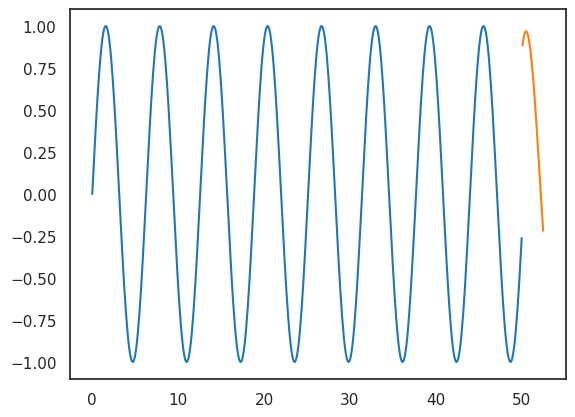

In [ ]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)

# Exercies 1 : GRU in Keras - Reuters classification

In [ ]:
num_words = 10000
maxlen = 1000
test_split = 0.3

In [ ]:
# Load reuters Data from Keras datasets
(X_train, y_train),(X_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.3)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

2110848/2110848 [==============================] - 0s 0us/step
7859 train sequences
3369 test sequences


In [ ]:
# data preprocessing
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


y_train = tf.keras.utils.to_categorical(y_train, 46)
y_test = tf.keras.utils.to_categorical(y_test, 46)

X_train shape: (7859, 1000)
X_test shape: (3369, 1000)


In [ ]:
model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 300,input_length=1000))
model.add(GRU(128, dropout=0.2))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 300)         3000000   
                                                                 
 gru (GRU)                   (None, 128)               165120    
                                                                 
 dense_1 (Dense)             (None, 46)                5934      
                                                                 
Total params: 3171054 (12.10 MB)
Trainable params: 3171054 (12.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train,batch_size=256,epochs=10,validation_split=0.2)
model.evaluate(X_test,y_test)

Epoch 1/10
25/25 [==============================] - 255s 10s/step - loss: 3.0729 - accuracy: 0.3299 - val_loss: 2.3204 - val_accuracy: 0.3575
Epoch 2/10
25/25 [==============================] - 242s 10s/step - loss: 2.1976 - accuracy: 0.3593 - val_loss: 2.0181 - val_accuracy: 0.4008
Epoch 3/10
25/25 [==============================] - 250s 10s/step - loss: 1.9210 - accuracy: 0.4296 - val_loss: 1.8724 - val_accuracy: 0.4822
Epoch 4/10
25/25 [==============================] - 240s 10s/step - loss: 1.7387 - accuracy: 0.5049 - val_loss: 1.8317 - val_accuracy: 0.5197
Epoch 5/10
25/25 [==============================] - 240s 10s/step - loss: 1.6039 - accuracy: 0.5620 - val_loss: 1.8101 - val_accuracy: 0.5299
Epoch 6/10
25/25 [==============================] - 238s 10s/step - loss: 1.4879 - accuracy: 0.6001 - val_loss: 1.8033 - val_accuracy: 0.5280
Epoch 7/10
25/25 [==============================] - 240s 10s/step - loss: 1.3915 - accuracy: 0.6226 - val_loss: 1.8343 - val_accuracy: 0.5350
Epoch 

[1.912722110748291, 0.5473434329032898]